In [9]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df=pd.read_csv('Algerian_forest_fire_cleaned_dataset.csv')

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df.drop(['day','month','year'],axis = 1, inplace=True)

In [ ]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [ ]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [ ]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [ ]:
X=df.drop('FWI', axis = 1)
y=df['FWI']

In [ ]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.25,random_state=43)

In [ ]:
X_train.shape

(182, 11)

In [ ]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.659120,-0.313004,-0.329720,0.701060,0.502747,0.393587,0.630473,0.476795,0.565026,0.299316
RH,-0.659120,1.000000,0.312190,0.245762,-0.670875,-0.399709,-0.227840,-0.703401,-0.346836,-0.491651,-0.435075
Ws,-0.313004,0.312190,1.000000,0.160958,-0.227260,-0.019928,0.045396,-0.017229,0.004554,-0.120561,-0.198738
Rain,-0.329720,0.245762,0.160958,1.000000,-0.555931,-0.275293,-0.287197,-0.348926,-0.285114,-0.390323,-0.046784
FFMC,0.701060,-0.670875,-0.227260,-0.555931,1.000000,0.592479,0.493368,0.746844,0.575405,0.782283,0.237565
DMC,0.502747,-0.399709,-0.019928,-0.275293,0.592479,1.000000,0.882414,0.679640,0.984318,0.583017,0.205296
DC,0.393587,-0.227840,0.045396,-0.287197,0.493368,0.882414,1.000000,0.513896,0.949592,0.485008,-0.085764
ISI,0.630473,-0.703401,-0.017229,-0.348926,0.746844,0.679640,0.513896,1.000000,0.637470,0.742329,0.288159
BUI,0.476795,-0.346836,0.004554,-0.285114,0.575405,0.984318,0.949592,0.637470,1.000000,0.567145,0.100737
Classes,0.565026,-0.491651,-0.120561,-0.390323,0.782283,0.583017,0.485008,0.742329,0.567145,1.000000,0.200545


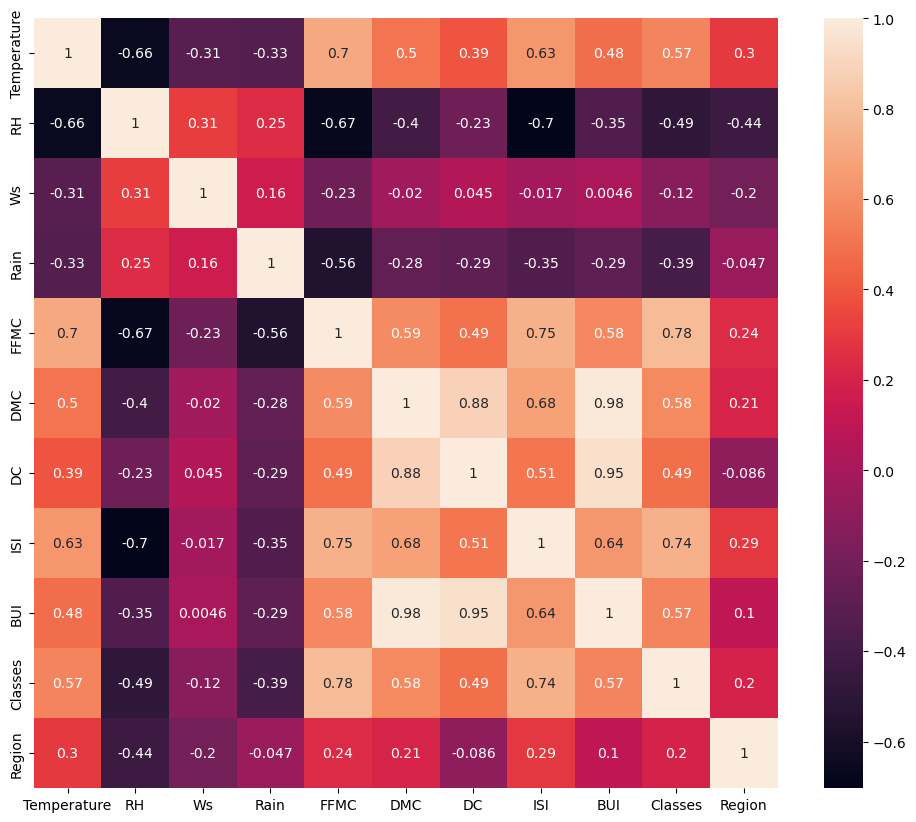

In [ ]:
plt.figure(figsize= (12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
import pandas as pd

def correlation(data, threshold=0.9):
    """
    Checks for multicollinearity in the dataset by finding highly correlated features.

    Parameters:
    - data (pd.DataFrame): The input DataFrame containing numerical features.
    - threshold (float): The correlation threshold above which features are considered highly correlated.

    Returns:
    - List of feature pairs with correlation above the threshold.
    """
    if not isinstance(data, pd.DataFrame):
        raise ValueError("Input data must be a pandas DataFrame.")
    
    # Compute correlation matrix
    corr_matrix = data.corr()

    # Initialize list to hold feature pairs with high correlation
    high_corr_pairs = set()

    # Iterate through the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):  # Avoid duplicate pairs and self-correlation
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col1 = corr_matrix.columns[i]
                col2 = corr_matrix.columns[j]
                high_corr_pairs.add((col1, col2, corr_matrix.iloc[i, j]))

    return high_corr_pairs 

In [ ]:
corr_features=correlation(X_train,0.85)

In [ ]:
def drop_correlated_columns(data, threshold=0.9):
    """
    Drops one column from each pair of highly correlated features in the dataset.

    Parameters:
    - data (pd.DataFrame): The input DataFrame containing numerical features.
    - threshold (float): The correlation threshold above which features are considered highly correlated.

    Returns:
    - pd.DataFrame: The DataFrame with one column dropped from each pair of highly correlated features.
    - set: The set of dropped columns.
    """
    # Get the highly correlated feature pairs
    high_corr_pairs = correlation(data, threshold=threshold)  # Updated to expect only one return value

    # Extract columns to drop
    cols_to_drop = set()
    for col1, col2, _ in high_corr_pairs:
        # Decide which column to drop (e.g., col2 in this case)
        cols_to_drop.add(col2)

    # Drop the columns from the DataFrame
    data_reduced = data.drop(columns=cols_to_drop)

    return data_reduced, cols_to_drop

In [ ]:
X_train, dropped_columns = drop_correlated_columns(X_train, threshold=0.85)
X_test , droppxd_columns = drop_correlated_columns(X_test,threshold = 0.85)

NameError: name 'drop_correlated_columns' is not defined

In [ ]:
X_train.shape

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
model = LinearRegression()
model.fit(X_train,Y_train)
Y_pred =model.predict(X_test)
mae = mean_absolute_error(Y_test,Y_pred)
score = r2_score(Y_test,Y_pred)

print (mae)
print (score)

plt.scatter(Y_test,Y_pred)
plt.show()

NameError: name 'X_train' is not defined

1.1626665590574776
0.9524019216349231


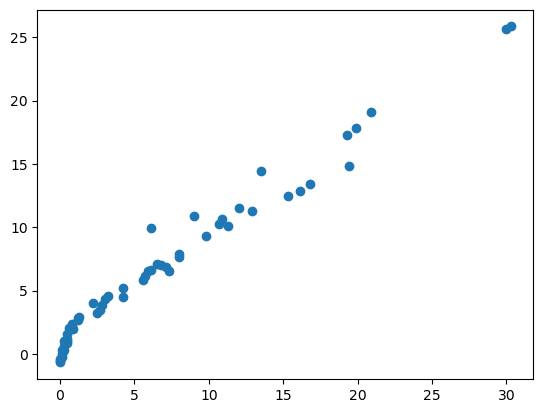

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lasso = Lasso()
lasso.fit(X_train,Y_train)
Y_pred =lasso.predict(X_test)
mae = mean_absolute_error(Y_test,Y_pred)
score = r2_score(Y_test,Y_pred)

print (mae)
print (score)

plt.scatter(Y_test,Y_pred)
plt.show()

0.7285821514895945
0.9807982726897482


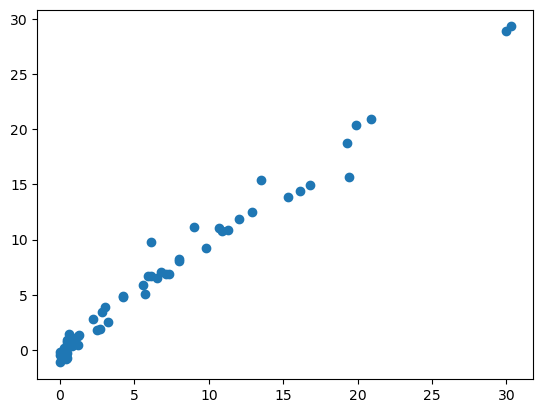

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge = Ridge()
ridge.fit(X_train,Y_train)
Y_pred =ridge.predict(X_test)
mae = mean_absolute_error(Y_test,Y_pred)
score = r2_score(Y_test,Y_pred)

print (mae)
print (score)

plt.scatter(Y_test,Y_pred)
plt.show()

1.783990002099594
0.8868096501682265


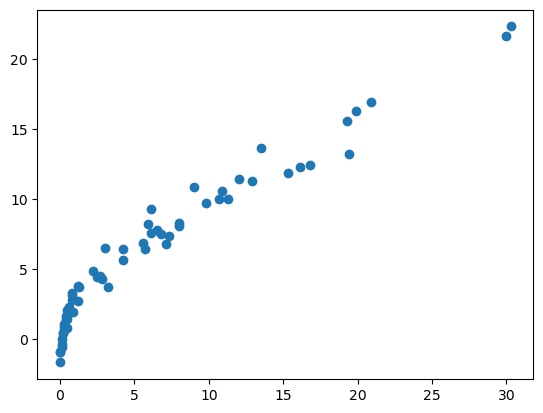

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
elastic = ElasticNet()
elastic.fit(X_train,Y_train)
Y_pred =elastic.predict(X_test)
mae = mean_absolute_error(Y_test,Y_pred)
score = r2_score(Y_test,Y_pred)

print (mae)
print (score)

plt.scatter(Y_test,Y_pred)
plt.show()

In [ ]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train,Y_train)
lassocv.alpha_

0.038957092934641474

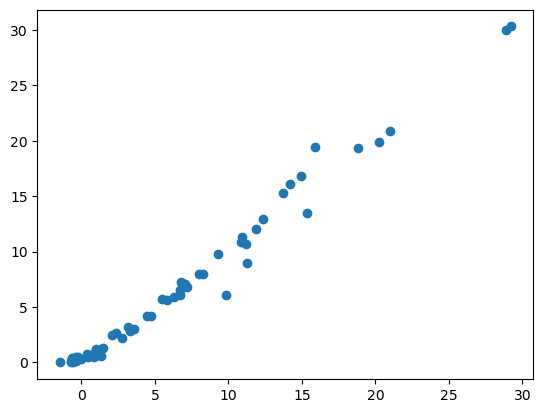

In [ ]:
Y_pred2 = lassocv.predict(X_test)
plt.scatter(Y_pred2, Y_test)
plt.show()

In [ ]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(lasso,open('forestLassoModel.pkl','wb'))